### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 8
### Due: Saturday, Apr 9th at 11.59pm CT
---

## Only one problem this week

1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
This is a structured numpy array. Find and print all of the column names. Using the data, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. How many regular galaxies and how many quasars are in this sample?


2. Make a scatter plot of $(u-g)$ versus $(g-r)$, color coding by galaxy or quasar class. The plot should include appropriate axis labels and a legend. Set `xlim` between -0.5 and 2.5, and `ylim` between -0.5 and 1.5.


3. Stack all colors and the redshift into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing.


4. Create a compact `for` loop that iterates over the fitting of a Gaussian Naive Bayes classification algorithm to successively more features of the data. Within the loop, compute and plot an ROC curve. The end result should be a plot showing ROC curves for GNB classification with more and more features of the data, with appropriate axis labels and a legend. Use `xlim` between 0 and 0.01. Which feature seems to make the classification trivially easy? *Note: `predict_proba` returns an array with as many columns as classes. You've labeled quasars as $1$, so for the ROC curve you must make sure to access the relevant quasar probability-- you can find this by accessing the **classes_** attribute of the estimator.*


5. Repeat (4) for Quadratic Discriminant Analysis. 


6. Let's try classification with GMM Bayes. Restrict the training and testing to be just on the $4$ colors. Iterate now over number of components in the GMM Bayes fit up to $10$, plotting ROC curves for all, and find the number of components that gives the best performance.


7. Repeat (6) for $K$-nearest neighbor classification, looping over number of neighbors between 5 and 100 in steps of 10. Find the number that gives the best performance. 


8. Repeat (6) for Decision Tree classification, looping over the maximum tree depth between 1 and 10. Find the number that gives the best performance. 


9. Finally, plot the ROC curves for GNB, QDA, and the best-performing GMMBayes, KNN, and DT classification algorithms, all using just the 4 colors. What is the overall best-performing classifier? 


10. Make a 2-panel plot, showing in the left panel the color-coded training data in $(u-g)$ versus $(g-r)$ (similar to item 2 above), and in the right panel the same features of the testing data color coded by their predicted class from the tuned best-performing classifier. 

### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [195]:
#Reading in data
data = np.load('/Users/petrop3/Repos/astr_8070_s22/coursework/homeworks/hw_data/hw8_data_1.npy')
print('Column names:', data.dtype.names)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')


In [196]:
#Creating color arrays
ug = data['u']-data['g']
gr = data['g']-data['r']
ri = data['r']-data['i']
iz = data['i']-data['z']

#Arrays for redshift and spectral class
z = data['redshift']
zerr = data['redshift_err']
specClass = data['specClass']

In [197]:
numQSO = np.where(specClass == 'QSO')[0]
print('Number of quasars:', len(numQSO))
print('Number of regular galaxies:', len(data)-len(numQSO))

Number of quasars: 7192
Number of regular galaxies: 42808


### Part 2

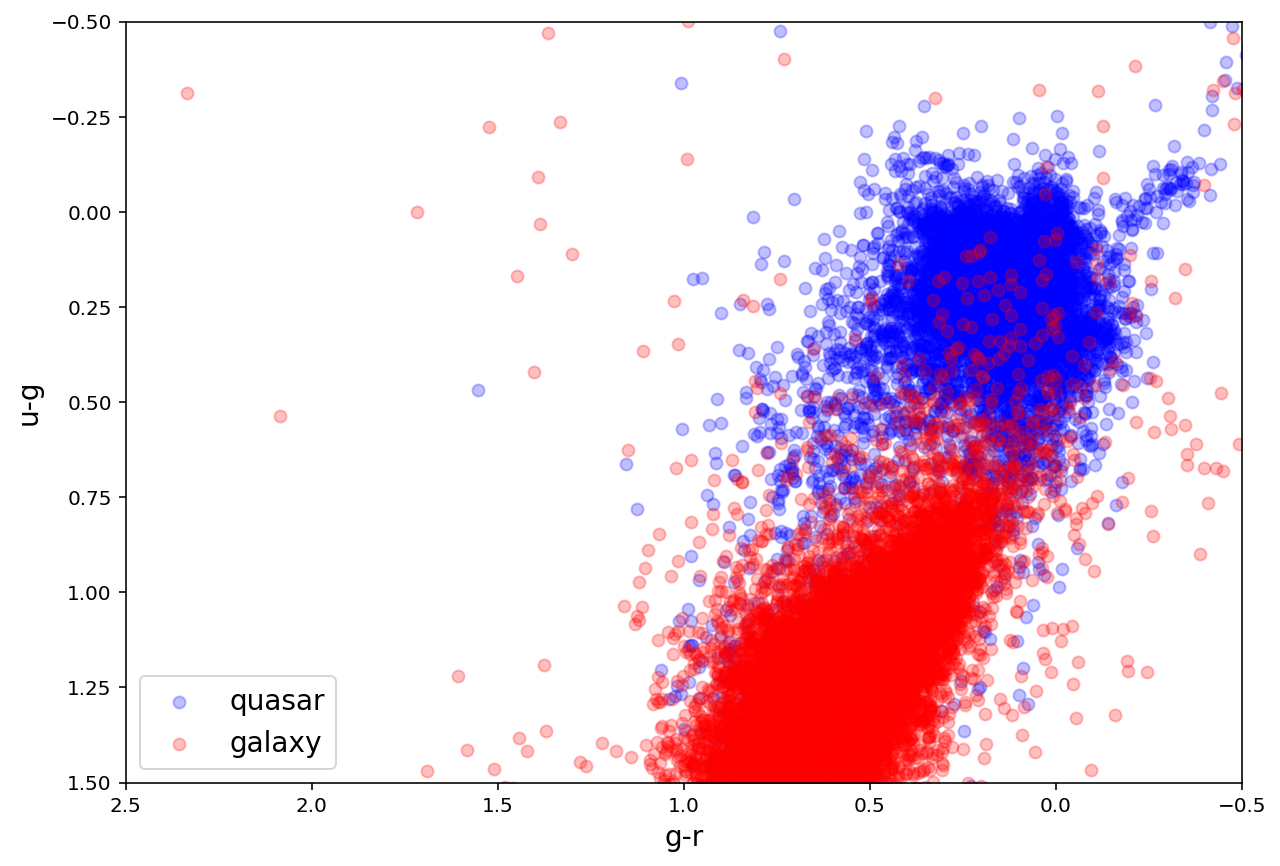

In [198]:
numG = np.where(specClass == 'GALAXY')[0]

plt.figure(figsize=(10,7))
plt.scatter(gr[numQSO], ug[numQSO], color='b', marker='o', alpha=0.25, label='quasar')
plt.scatter(gr[numG], ug[numG], color='r', marker='o', alpha=0.25, label='galaxy')
plt.xlabel('g-r', fontsize=14)
plt.ylabel('u-g', fontsize=14)
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(loc='lower left', fontsize=14)
plt.show()

SRT: Something strange has happened here. The galaxies shouldn't be being cut off in u-g. Must be something to do with the axis inversion. -1. On the other hand, kudos for doing axis inversion!

### Part 3

In [199]:
#Stacking all colors and redshift into data matrix
X = np.column_stack((ug, gr, ri, iz, z))

#Target label array: 0=galaxy, 1=quasar
y = np.zeros(len(data))
y[numQSO] = 1

In [200]:
from sklearn.model_selection import train_test_split

#Train-test split, taking 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Part 4

In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

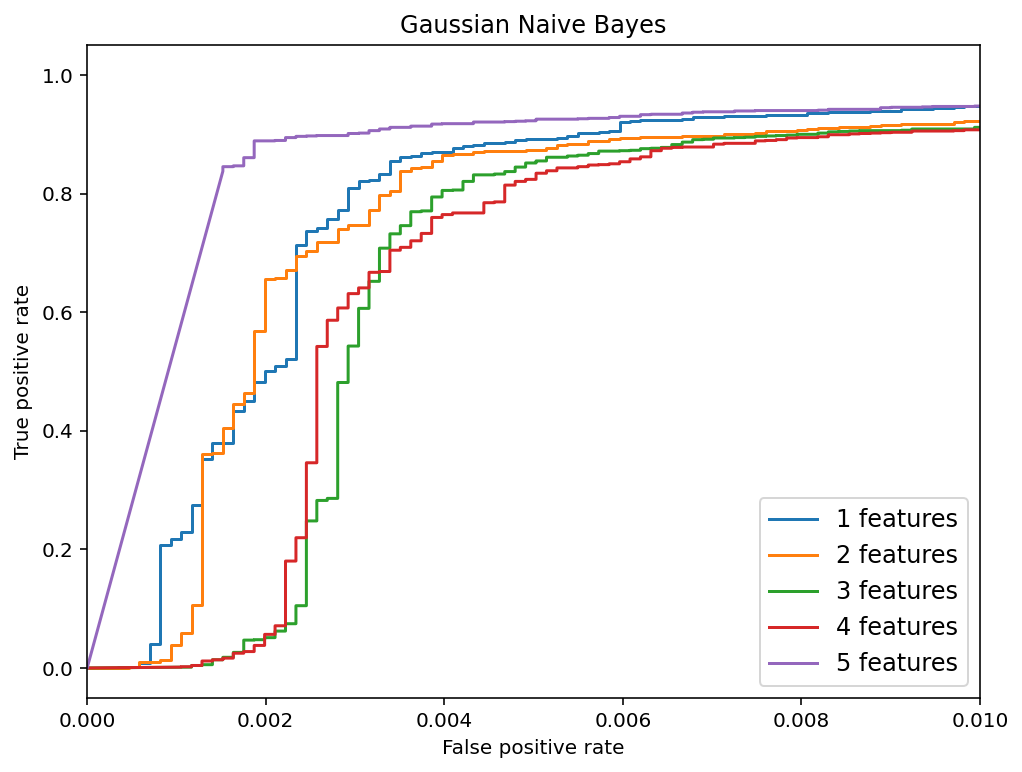

In [202]:
gnb = GaussianNB()

plt.figure(figsize=(8,6))

for i in range(len(X[0])):
    gnb.fit(X_train[:,0:i+1],y_train)
    y_prob = gnb.predict_proba(X_test[:,0:i+1])

    #gnb.classes_ gives column of 0s = galaxy; column of 1s = quasar
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    plt.plot(fpr, tpr, color=f'C{i}', label=f'{i+1} features')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.title('Gaussian Naive Bayes')
plt.legend(fontsize='large')
plt.show()

Seems like the 5th feature - redshift - really makes the classification easy.

SRT: Very good.

### Part 5

In [203]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

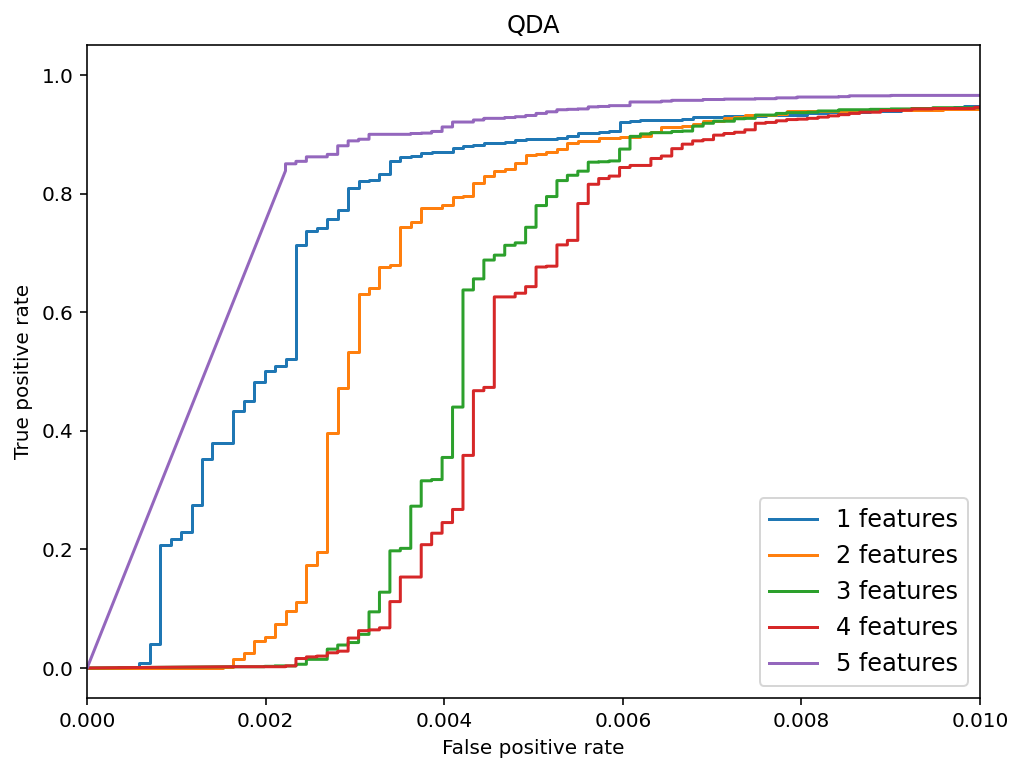

In [204]:
qda = QDA()

plt.figure(figsize=(8,6))

for i in range(len(X[0])):
    qda.fit(X_train[:,0:i+1],y_train)
    y_prob = qda.predict_proba(X_test[:,0:i+1])

    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    plt.plot(fpr, tpr, color=f'C{i}', label=f'{i+1} features')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.title('QDA')
plt.legend(fontsize='large')
plt.show()

As in the case with GNB, the redshift is what makes classification easy.

### Part 6

In [205]:
from astroML.classification import GMMBayes

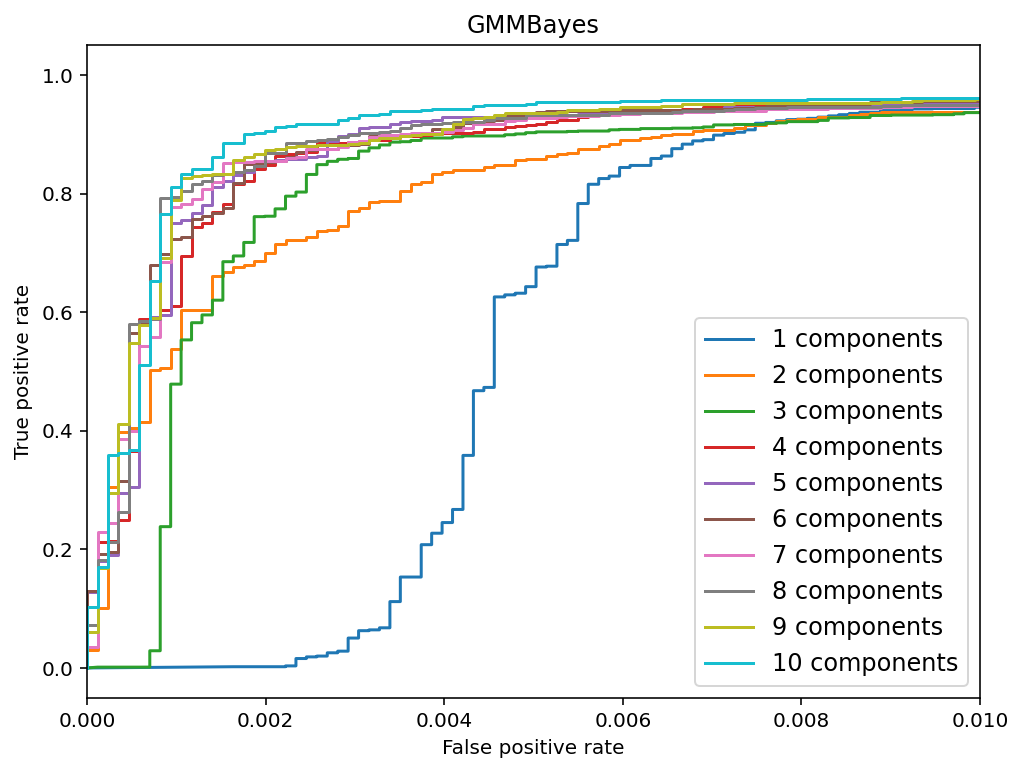

In [206]:
plt.figure(figsize=(8,6))

for i in range(10):
    gmmb = GMMBayes(n_components=i+1)
    gmmb.fit(X_train[:,0:4], y_train) #taking only first four columns of X_train, excluding redshift
    y_prob = gmmb.predict_proba(X_test[:,0:4])
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    plt.plot(fpr, tpr, color=f'C{i}', label=f'{i+1} components')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.title('GMMBayes')
plt.legend(fontsize='large')
plt.show()

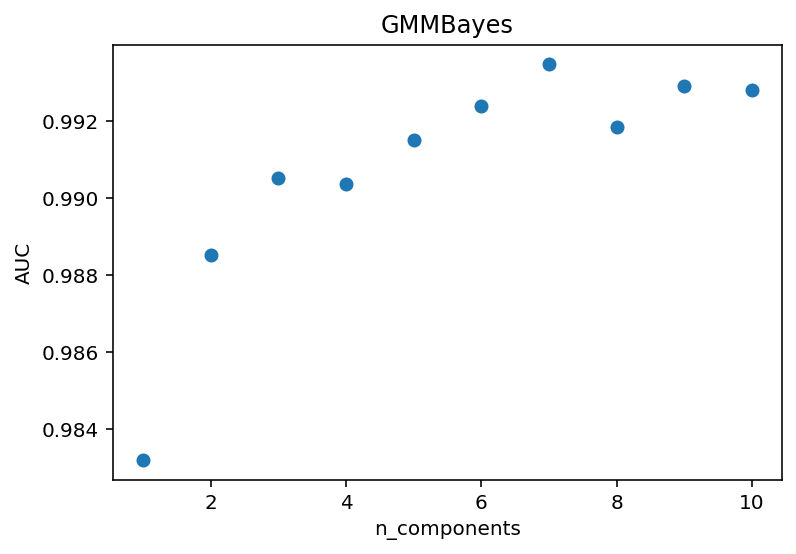

Number of components for best GMMBayes performance: 7


In [207]:
#Finding the number of components that gives the best performance
#Best performance = largest area under ROC curve
#This loop will calculate AUC for each number of components
#And then plot AUC as a function of n_components
#(Could have included this in the previous for loop)

from sklearn.metrics import auc #function to compute area

AUC = []
for i in range(10):
    gmmb = GMMBayes(n_components=i+1)
    gmmb.fit(X_train[:,0:4], y_train)
    y_prob = gmmb.predict_proba(X_test[:,0:4])
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    AUC.append(auc(fpr, tpr))
    
plt.scatter(np.arange(1,11,1), AUC, marker='o')
plt.xlabel('n_components')
plt.ylabel('AUC')
plt.title('GMMBayes')
plt.show()

max_ind = np.argmax(AUC)
print('Number of components for best GMMBayes performance:', max_ind+1)

SRT: Excellent method here, Polina!

### Part 7

In [208]:
from sklearn.neighbors import KNeighborsClassifier

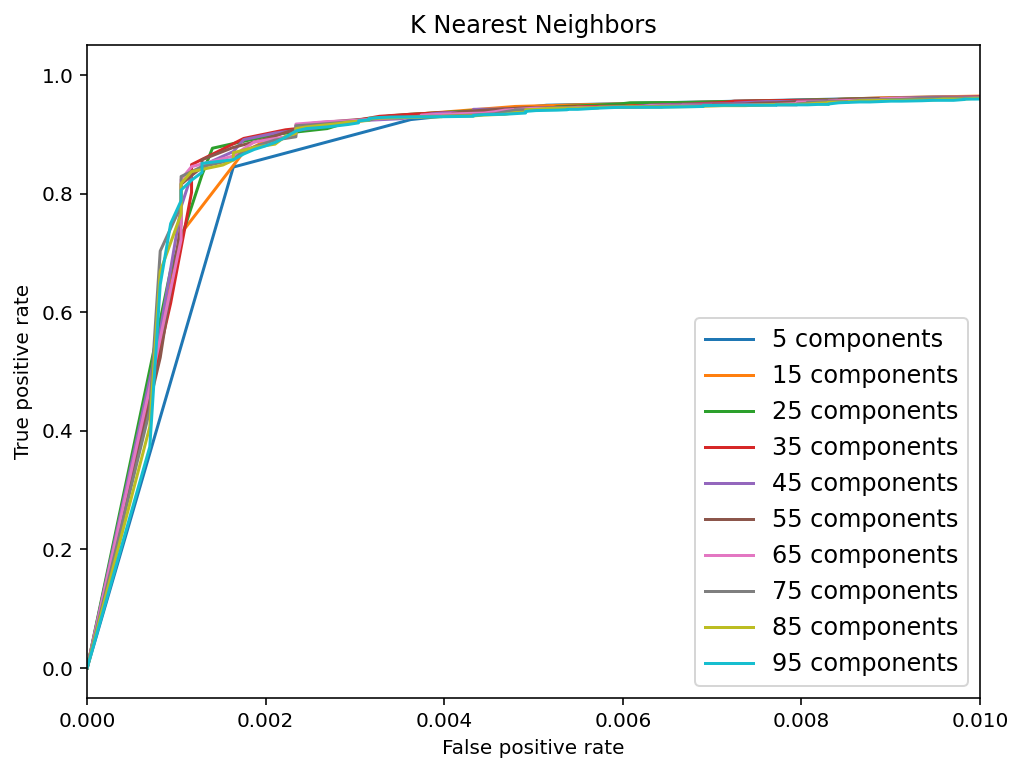

In [209]:
kvals = np.arange(5,100,10)

plt.figure(figsize=(8,6))

AUC = []
for i,k in enumerate(kvals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,0:4], y_train) #taking only first four columns of X_train, excluding redshift
    y_prob = knn.predict_proba(X_test[:,0:4])
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    AUC.append(auc(fpr, tpr))
    plt.plot(fpr, tpr, color=f'C{i}', label=f'{k} components')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.title('K Nearest Neighbors')
plt.legend(fontsize='large')
plt.show()

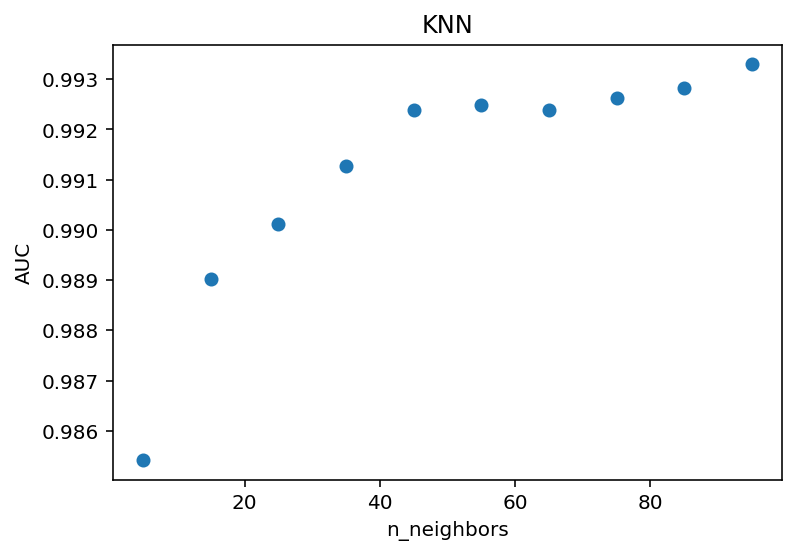

Number of neighbors for best KNN performance: 95


In [210]:
#Finding the number that gives the best performance

plt.scatter(kvals, AUC, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('AUC')
plt.title('KNN')
plt.show()

max_ind = np.argmax(AUC)
print('Number of neighbors for best KNN performance:', kvals[max_ind])

### Part 8

In [211]:
from sklearn.tree import DecisionTreeClassifier

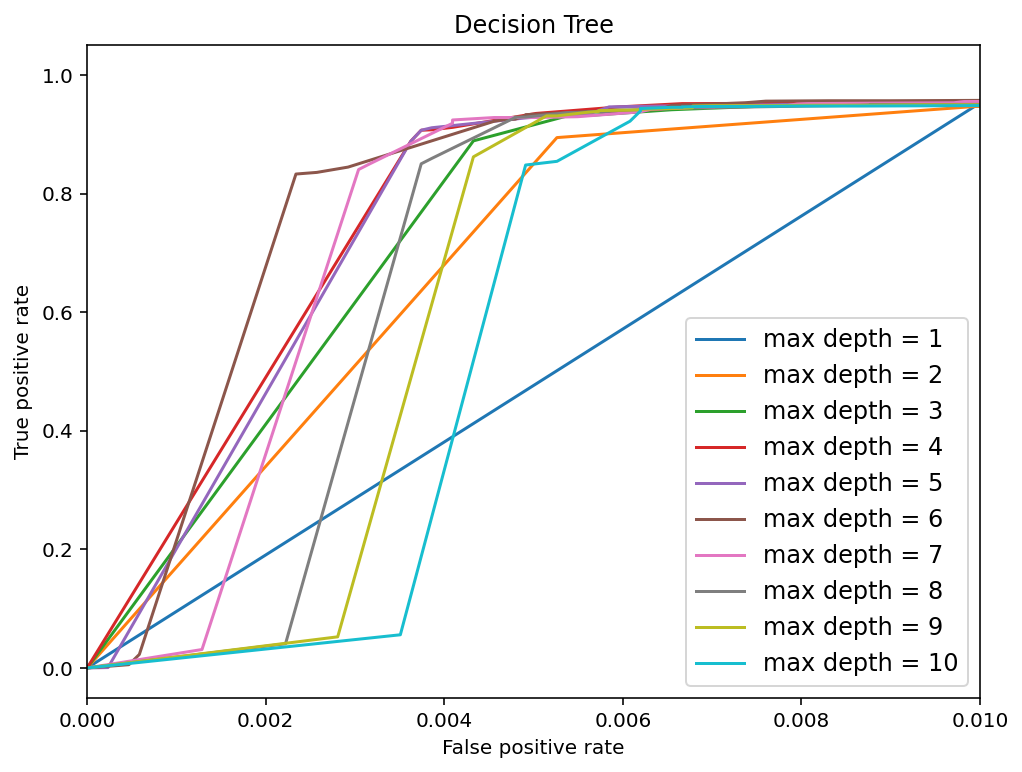

In [212]:
plt.figure(figsize=(8,6))

AUC = []
for i in range(10):
    dt = DecisionTreeClassifier(max_depth=i+1)
    dt.fit(X_train[:,0:4], y_train) #taking only first four columns of X_train, excluding redshift
    y_prob = dt.predict_proba(X_test[:,0:4])
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    AUC.append(auc(fpr, tpr))
    plt.plot(fpr, tpr, color=f'C{i}', label=f'max depth = {i+1}')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.title('Decision Tree')
plt.legend(fontsize='large')
plt.show()

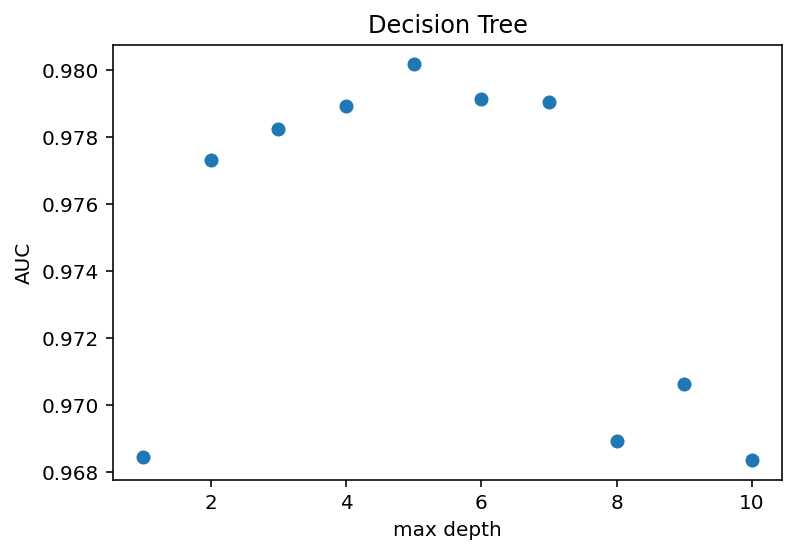

Max depth for best DT performance: 5


In [213]:
#Finding the number that gives the best performance

plt.scatter(np.arange(1,11,1), AUC, marker='o')
plt.xlabel('max depth')
plt.ylabel('AUC')
plt.title('Decision Tree')
plt.show()

max_ind = np.argmax(AUC)
print('Max depth for best DT performance:', max_ind+1)

SRT: Great!

### Part 9

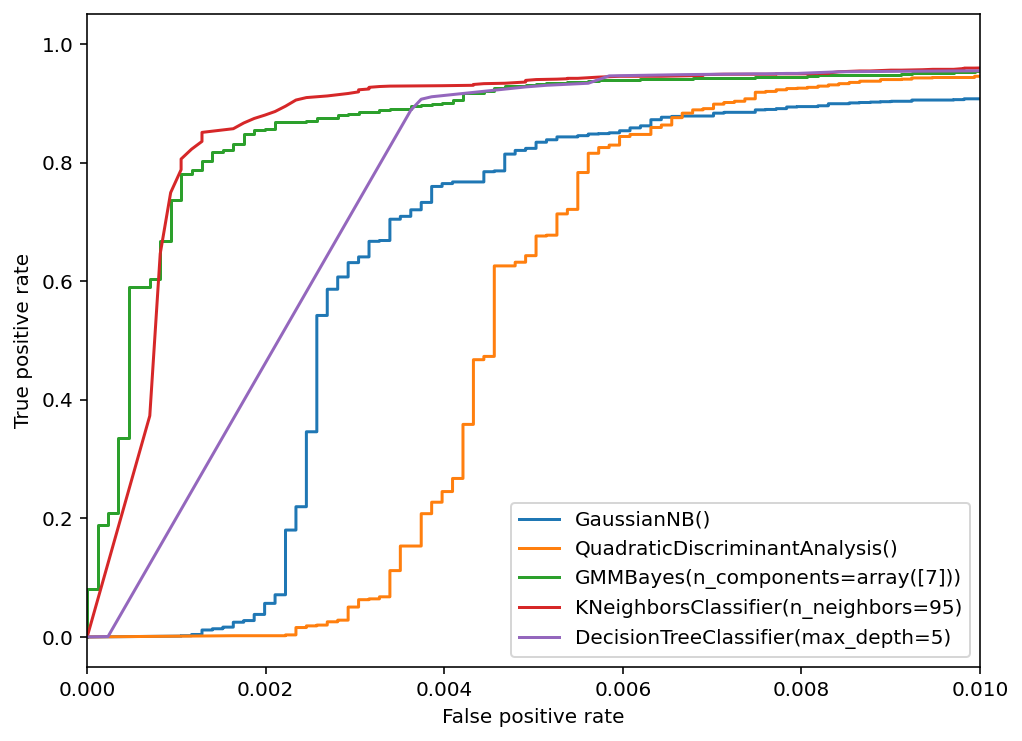

In [214]:
classifiers = [GaussianNB(), QDA(), GMMBayes(n_components=7),
       KNeighborsClassifier(n_neighbors=95), DecisionTreeClassifier(max_depth=5)]

plt.figure(figsize=(8,6))

AUC = []
for clf in classifiers:
    clf.fit(X_train[:,0:4], y_train)
    y_prob = clf.predict_proba(X_test[:,0:4])
    fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
    AUC.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, label=f'{clf}')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(0,0.01)
plt.legend()
plt.show()

In [215]:
#What is the overall best-performing classifier?
max_ind = np.argmax(AUC)
print('Overall best-performing classifier:', classifiers[max_ind])

Overall best-performing classifier: KNeighborsClassifier(n_neighbors=95)


In [216]:
#Printing out all curve areas just for comparison
for c,area in zip(classifiers,AUC):
    print(f'{c}:',area)

GaussianNB(): 0.9789912960168278
QuadraticDiscriminantAnalysis(): 0.983187028719979
GMMBayes(n_components=array([7])): 0.9925521444371515
KNeighborsClassifier(n_neighbors=95): 0.9932903969993125
DecisionTreeClassifier(max_depth=5): 0.9801730492431094


### Part 10

In [217]:
#Getting labels for training data only
qso_train = np.where(y_train == 1.)[0]
gxy_train = np.where(y_train == 0.)[0]

#Fitting on training data, predicting on testing data, getting labels for testing data
best = KNeighborsClassifier(n_neighbors=95)
best.fit(X_train[:,0:4], y_train)
y_pred = best.predict(X_test[:,0:4])
qso_pred = np.where(y_pred == 1.)[0]
gxy_pred = np.where(y_pred == 0.)[0]

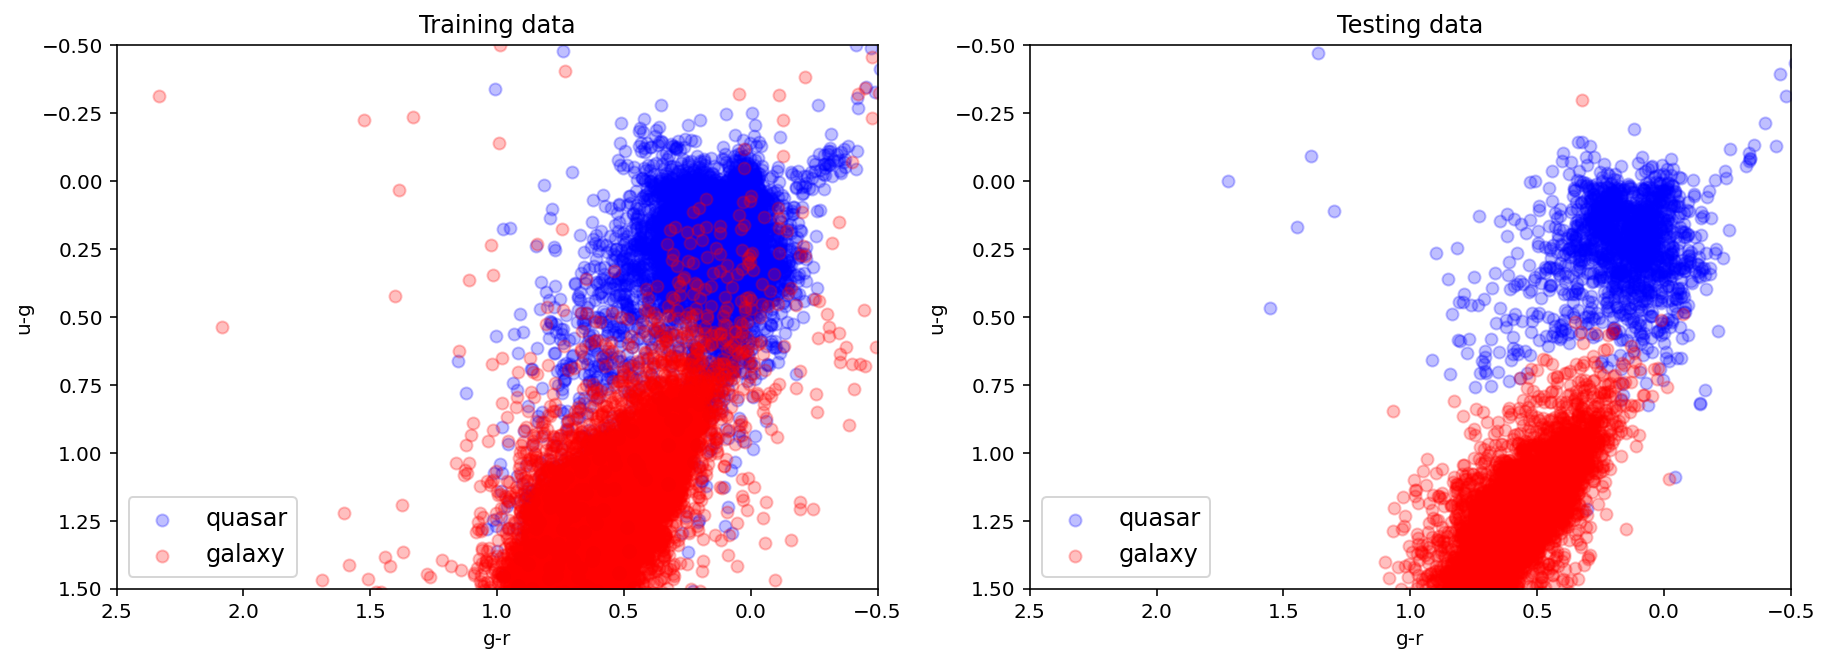

In [221]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

#Left panel with color-coded training data
ax[0].scatter(X_train[qso_train][:,1], X_train[qso_train][:,0], color='b', marker='o', alpha=0.25, label='quasar')
ax[0].scatter(X_train[gxy_train][:,1], X_train[gxy_train][:,0], color='r', marker='o', alpha=0.25, label='galaxy')
ax[0].set_xlim(-0.5,2.5)
ax[0].set_ylim(-0.5,1.5)
ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].set_xlabel('g-r')
ax[0].set_ylabel('u-g')
ax[0].set_title('Training data')
ax[0].legend(loc='lower left', fontsize=12)

#Right panel with color-coded testing data
ax[1].scatter(X_test[qso_pred][:,1], X_test[qso_pred][:,0], color='b', marker='o', alpha=0.25, label='quasar')
ax[1].scatter(X_test[gxy_pred][:,1], X_test[gxy_pred][:,0], color='r', marker='o', alpha=0.25, label='galaxy')
ax[1].set_xlim(-0.5,2.5)
ax[1].set_ylim(-0.5,1.5)
ax[1].invert_xaxis()
ax[1].invert_yaxis()
ax[1].set_xlabel('g-r')
ax[1].set_ylabel('u-g')
ax[1].set_title('Testing data')
ax[1].legend(loc='lower left', fontsize=12)

plt.show()

SRT: Excellent work, Polina. The axis inversion still created some plotting issues here, but the techniques and tests were perfect.